In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
from functools import partial
from scipy.integrate import odeint, ode
from sdeint import itoint

from pacological.chance import chance, phi
from pacological.util import phi as phi_i
from convenience.numpy import save_hdfz, load_hdfz

from fakespikes.rates import stim
from pacological.util import create_I, ornstein_uhlenbeck

In [52]:
# Init time:
tmax = 1.0  # run time, second
dt = 1.e-4  # resolution, 0.1 ms
times = np.linspace(0, tmax, int(tmax / dt))

# Params
f=0
I_e=120e-9
I_i=80e-9

# Stim params
d = 60e-16  # drive rate (want 0-1)
scale = .1 * d
Istim = create_I(tmax, d, scale, dt=dt, seed=1)

# Weights
w_ee=100e-6
w_ei=1e-9
w_ie=1e-9
w_ii=1e-9
    
w_be=1e-9
w_bi=1e-9
rbe=135e2
rbi=135e2

# Run
ys0 = np.asarray([8.0, 12.0, w_ee/2, w_ei/2, w_ie/2, w_ii/2, w_be/2, w_bi/2, 0, 0])
f = partial(chance, Istim=Istim, 
            w_ee=w_ee, w_ei=w_ei, w_ie=w_ie, w_ii=w_ii, 
            w_be=w_be, w_bi=w_bi, rbe=rbe, rbi=rbi, 
            f=f, 
            I_e=I_e, I_i=I_i)
g = partial(ornstein_uhlenbeck, sigma=.1, loc=[0, 1]) 

ys = itoint(f, g, ys0, times)
# ys = odeint(f, ys0, times, mxstep=5000000)

I 6e-15, I_re 2.7499875e-06
I 6e-15, I_re 2.7499875e-06
I 6e-15, I_re 2.7499875e-06
I 6.9746072182e-15, I_re 2.6993825345e-06
I 6.9746072182e-15, I_re 2.69977861337e-06
I 6.60755337001e-15, I_re 2.64996270765e-06
I 6.60755337001e-15, I_re 2.65035627614e-06
I 6.29065031865e-15, I_re 2.60132514302e-06
I 6.29065031865e-15, I_re 2.60171595786e-06
I 5.64686914536e-15, I_re 2.55346333579e-06
I 5.64686914536e-15, I_re 2.55385122506e-06
I 6.16611372295e-15, I_re 2.50637212249e-06
I 6.16611372295e-15, I_re 2.50675687304e-06
I 4.78519050482e-15, I_re 2.46004551504e-06
I 4.78519050482e-15, I_re 2.46042694375e-06
I 5.83207756335e-15, I_re 2.41447544443e-06
I 5.83207756335e-15, I_re 2.41485344504e-06
I 5.37535342282e-15, I_re 2.36965493218e-06
I 5.37535342282e-15, I_re 2.37002936696e-06
I 5.56677688045e-15, I_re 2.32557668322e-06
I 5.56677688045e-15, I_re 2.3259474279e-06
I 5.41715465516e-15, I_re 2.28223197616e-06
I 5.41715465516e-15, I_re 2.28259896055e-06
I 6.29441941739e-15, I_re 2.23961364133e

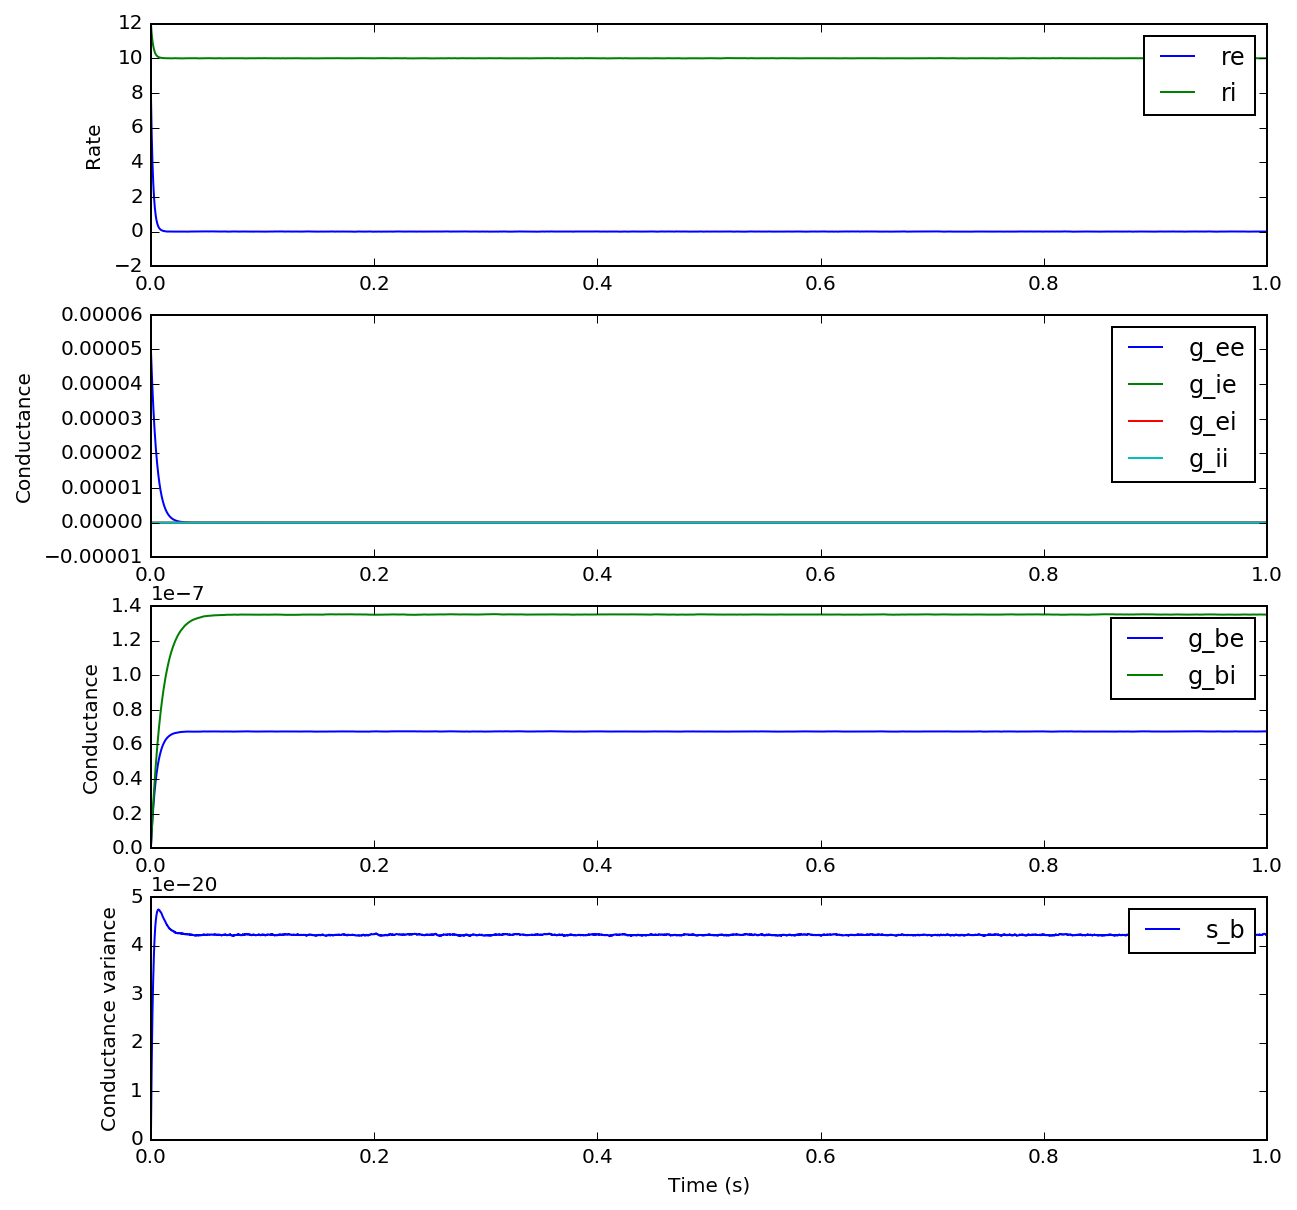

In [53]:
# --
plt.figure(figsize=(10,10))


plt.subplot(411)
plt.plot(times, ys[:, 0], label='re')
plt.plot(times, ys[:, 1], label='ri')
plt.xlim(0, tmax)
plt.ylabel("Rate")
plt.legend()

plt.subplot(412)
plt.plot(times, ys[:, 2], label='g_ee')
plt.plot(times, ys[:, 3], label='g_ie')
plt.plot(times, ys[:, 4], label='g_ei')
plt.plot(times, ys[:, 5], label='g_ii')
plt.xlim(0, tmax)
plt.ylabel("Conductance")
plt.legend()

plt.subplot(413)
plt.plot(times, ys[:, 6], label='g_be')
plt.plot(times, ys[:, 7], label='g_bi')
plt.xlim(0, tmax)
plt.ylabel("Conductance")
plt.legend()

plt.subplot(414)
Sb = ys[:, 8] * (50e-3**2) + ys[:, 9] * (-25e-3 **2) 
plt.plot(times, Sb, label='s_b')
plt.xlim(0, tmax)
plt.ylabel("Conductance variance")
plt.legend()

plt.xlabel("Time (s)")

In [54]:
ys[:4, 7:9]

array([[  5.00000000e-10,   0.00000000e+00],
       [  1.83882221e-09,   1.33636690e-18],
       [  3.16874626e-09,   2.59591671e-18],
       [  4.47402410e-09,   3.81535223e-18]])

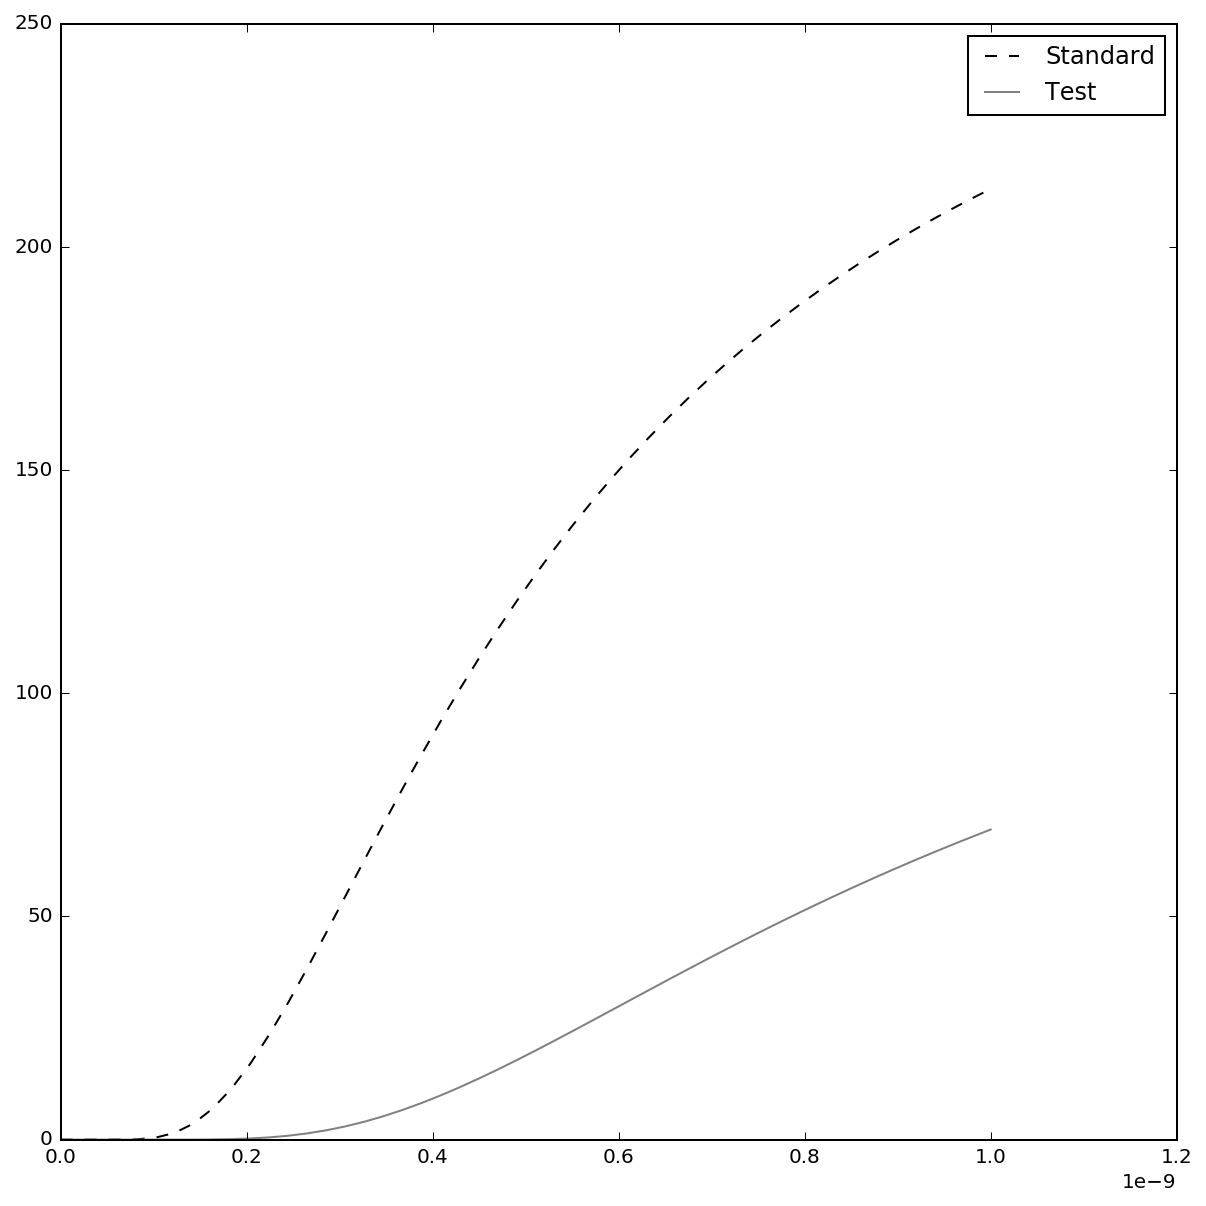

In [63]:
Is = np.linspace(0, 1, 50) / 1e9
Ibias = 5e-9

g0 = np.mean(w_be + w_bi) / 0.04
gb = np.mean([ys[:, 6].mean(), ys[:, 7].mean()])

plt.figure(figsize=(10, 10))
plt.plot(Is, phi(Is, Ibias, g0, gb, 10e-7), color='k', label="Standard", linestyle='--')
plt.plot(Is, phi(Is, Ibias, g0, gb, 5e-7), color='grey', label="Test")
plt.legend()